<a href="https://colab.research.google.com/github/eugenetwc/Medium-Notebooks/blob/master/arima_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA for Hierarchical Time Series Forecasting

References:
- https://github.com/carlomazzaferro/scikit-hts-examples/blob/master/notebooks/M5.ipynb

## Stationarity

In [66]:
import datapane as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX


sns.set_theme()

# import warnings
# warnings.filterwarnings("ignore")

In [67]:
date = pd.date_range(start='2020-01-01', end='2020-09-01', freq='D')
y_stationary_1 = np.random.normal(0, 10, size=date.shape)
df_stationary_1 = pd.DataFrame({'y': y_stationary_1}, index=date)
df_stationary_1.head()

,y
2020-01-01,-8.885588
2020-01-02,15.491918
2020-01-03,19.100429
2020-01-04,-9.305427
2020-01-05,-11.943357


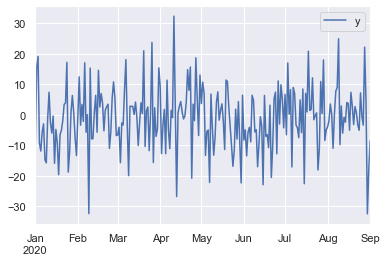

In [68]:
stationary_1_plot = df_stationary_1.plot()

In [69]:
y_stationary_2 = np.random.normal(0, 10, size=date.shape) * np.sin(2 * np.pi * np.arange(date.shape[0]))
df_stationary_2 = pd.DataFrame({'y': y_stationary_2}, index=date)
df_stationary_2.head()

,y
2020-01-01,-0.000000e+00
2020-01-02,7.558639e-16
2020-01-03,-3.007008e-15
2020-01-04,-1.247388e-14
2020-01-05,-9.387188e-15


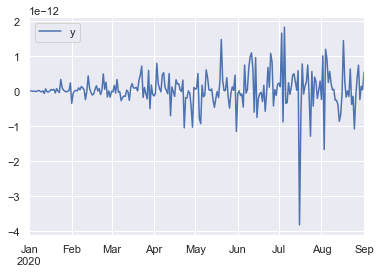

In [70]:
stationary_2_plot = df_stationary_2.plot()

# Download M5 Datset

In [14]:
!kaggle competitions download -c m5-forecasting-accuracy

 90%|██████████████████████████████████    | 41.0M/45.8M [00:03<00:00, 13.2MB/s]
100%|██████████████████████████████████████| 45.8M/45.8M [00:03<00:00, 13.0MB/s]


In [15]:
!unzip m5-forecasting-accuracy.zip

Archive:  m5-forecasting-accuracy.zip
  inflating: calendar.csv            
  inflating: sales_train_evaluation.csv  
  inflating: sales_train_validation.csv  
  inflating: sample_submission.csv   
  inflating: sell_prices.csv         


# SARIMA Example

In [123]:
df = pd.read_csv('sales_train_evaluation.csv', encoding='utf-8', engine='c')
train_sample = df.iloc[0][[f'd_{i}' for i in range(1, 1913+1)]].values.astype(int)
test_sample = df.iloc[0][[f'd_{i}' for i in range(1914, 1941+1)]].values.astype(int)

model = SARIMAX(train_sample, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()
preds = model_fit.forecast(test.shape[0])

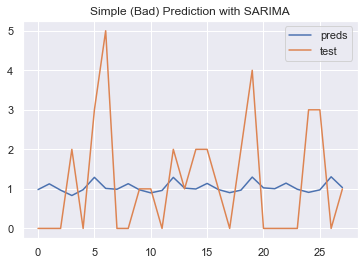

In [124]:
sarima_plot = plt.figure()
plt.title('Simple (Bad) Prediction with SARIMA')
plt.plot(preds, label='preds')
plt.plot(test_sample, label='test')
plt.legend()

In [125]:
# https://github.com/CamDavidsonPilon/Python-Numerics/blob/master/TimeSeries/MASE.py

def MASE(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
#     print "Needs to be tested."
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d


error = MASE(train_sample, test_sample, preds)
print('MASE:', error)

MASE: 2.766379692665588


In [140]:
stepwise_fit = pm.auto_arima(train_sample, start_p=0, start_q=0,
                            max_p=4, max_q=4, m=7,
                            start_P=0, start_Q=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=6076.087, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=5003.616, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=5567.253, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=4813.081, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.69 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=5323.597, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=4636.208, Time=0.66 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=4824.230, Time=0.37 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=2.22 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.27 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=4560.336, Time=0.78 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=4756.202, Time=0.44 sec
 ARIMA(3,1,0)(2,1,1)[7]             : AIC=inf, Time=2.67 s

In [141]:
preds_auto = stepwise_fit.predict(28)

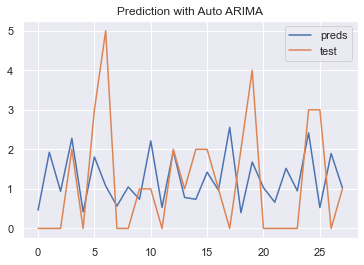

In [142]:
auto_arima_plot = plt.figure()
plt.title('Prediction with Auto ARIMA')
plt.plot(preds_auto, label='preds')
plt.plot(test_sample, label='test')
plt.legend()

In [144]:
error_auto = MASE(train_sample, test_sample, preds_auto)
print('MASE:', error)

MASE: 2.766379692665588


# HTS
## Transform data in the format required by scikit-hts

In [147]:
train = pd.read_csv('sales_train_validation.csv', encoding='utf-8', engine='c')
train = train.sample(n=50, random_state=43)

# Ensures uniqueness of category, dept, and item across hierarchie
train['cat_id']  = (train['store_id'] + '_' + train['cat_id'])
train['dept_id'] = (train['store_id'] + '_' + train['dept_id'])
train['id'] = (train['store_id'] + '_' + train['id'])

In [148]:
calendar = pd.read_csv('calendar.csv')

day_cols = [col for col in train.columns if col.startswith('d_')]
idx = [int(col.split('d_')[1]) for col in day_cols]

# will be useful later
train_date_id = pd.to_datetime(calendar[calendar.d.apply(lambda x: int(x.split('d_')[1])).isin(idx)].date)

In [149]:
def transpose(column, index, day_col):
    """
    Turn the row oriented time series into a column oriented one 
    """
    ts = []
    new_cols = train[column].unique()
    
    for value in new_cols:
        value_ts = train[train[column] == value]
        vertical = value_ts[day_col].sum().T
        vertical.index = index
        ts.append(vertical)
    return pd.DataFrame({k: v for k, v in zip(new_cols, ts)})

In [150]:
state_ts = transpose('state_id', train_date_id, day_cols)
store_ts = transpose('store_id', train_date_id, day_cols)
cat_ts = transpose('cat_id', train_date_id, day_cols)
dept_ts = transpose('dept_id', train_date_id, day_cols)
item_ts = transpose('id', train_date_id, day_cols)


In [151]:
df = pd.concat([state_ts, store_ts, cat_ts,dept_ts, item_ts], 1)

# Total column is the root node -- the sum of of all demand across all stores (we have data on, at least)
df['total'] = df['CA'] + df['TX'] + df['WI']

df.head()

,WI,TX,CA,WI_1,TX_1,CA_2,TX_3,WI_2,TX_2,WI_3,...,TX_2_FOODS_3_523_TX_2_validation,CA_4_FOODS_3_679_CA_4_validation,CA_1_FOODS_2_333_CA_1_validation,CA_4_FOODS_2_326_CA_4_validation,WI_1_FOODS_2_204_WI_1_validation,CA_4_HOBBIES_2_115_CA_4_validation,WI_2_FOODS_1_151_WI_2_validation,WI_2_HOBBIES_1_121_WI_2_validation,TX_1_HOBBIES_1_315_TX_1_validation,total
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,6,36,12,2,2,3,8,1,26,3,...,0,0,2,6,0,0,0,0,0,54
2011-01-30,1,34,11,0,2,4,6,0,26,1,...,0,0,2,4,0,0,0,0,0,46
2011-01-31,2,30,7,0,1,4,5,0,24,2,...,0,0,0,0,0,1,0,0,0,39
2011-02-01,3,18,7,0,0,2,3,1,15,2,...,0,0,3,0,0,0,0,0,0,28
2011-02-02,3,15,4,0,0,1,0,0,15,3,...,0,0,0,1,0,0,0,0,0,22


In [152]:
# df.to_csv('M5_hierarchy.csv')

In [153]:
states = train.state_id.unique()
stores = train.store_id.unique()
depts = train.dept_id.unique()
cats = train.cat_id.unique()
items = train.id.unique()

# Here we build the tree as a dictionary. Each node (key in dict) has a list of 
# children value in dict, which in turn may also be a key in the dict, and have 
# children as well 
total = {'total': list(states)}
state_h = {k: [v for v in stores if v.startswith(k)] for k in states}
store_h = {k: [v for v in cats if v.startswith(k)] for k in stores}
dept_h = {k: [v for v in depts if v.startswith(k)] for k in cats}
item_h = {k: [v for v in items if v.startswith(k)] for k in depts}

In [168]:
depts

array(['WI_1_FOODS_2', 'WI_1_HOBBIES_1', 'WI_1_FOODS_3', 'TX_1_HOBBIES_2',
       'CA_2_HOUSEHOLD_2', 'TX_3_FOODS_3', 'WI_2_FOODS_1',
       'CA_2_HOUSEHOLD_1', 'TX_2_FOODS_3', 'WI_3_FOODS_3',
       'CA_1_HOUSEHOLD_1', 'WI_2_HOUSEHOLD_2', 'CA_4_HOBBIES_2',
       'CA_2_FOODS_2', 'WI_3_HOBBIES_1', 'CA_4_HOBBIES_1',
       'TX_3_HOBBIES_1', 'TX_1_HOUSEHOLD_1', 'TX_1_FOODS_3',
       'CA_2_FOODS_3', 'CA_4_FOODS_3', 'TX_2_FOODS_2', 'CA_3_HOUSEHOLD_2',
       'WI_2_FOODS_3', 'CA_3_FOODS_3', 'CA_2_HOBBIES_1', 'CA_4_FOODS_2',
       'TX_3_HOUSEHOLD_2', 'TX_2_HOBBIES_2', 'CA_1_FOODS_2',
       'WI_2_HOBBIES_1', 'TX_1_HOBBIES_1'], dtype=object)

In [154]:
# import json

hierarchy = {**total, **state_h, **store_h, **dept_h, **item_h}

# with open('hierarchy.json', 'w') as j:
#     json.dump(hierarchy, j)

### A small digression
For exemplification purposes, here's what the hierarchy tree looks like. You are unlikely to need to build it yourself, it is instead built by the library automatically


In [155]:
from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=df)

# print(f'Root node: key: {ht.key}, children: {[k.key for k in ht.children]}')

# for child in ht.children:
#     print(f'{child.key} node\'s children: {[c.key for c in child]} ')

Let's print the tree from the California node:


In [156]:
# print(ht.children[0].key)

# print(ht.children[0])

You see the point. The hierarchy tree is recursively defined, and you can inspect any of the data of those nodes. For instance:

In [157]:
# observe the recursive structure
print(f'Node: {ht.children[0].children[2].children[2].key}, item: ')
ht.children[0].children[2].children[2].item

IndexError: list index out of range

In [159]:
df = df.resample("D").sum()

## Model fitting with scikit-hts
We will be using ARIMA from the pmdarima package. scikit-hts has a wrapper for the arima model.

In [160]:
from hts import HTSRegressor

clf = HTSRegressor(model='sarimax', revision_method='OLS', n_jobs=3)
model = clf.fit(df, hierarchy)

Fitting models: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


In [161]:
preds = model.predict(steps_ahead=28)

Fitting models: 100%|██████████| 15/15 [00:02<00:00,  6.47it/s]


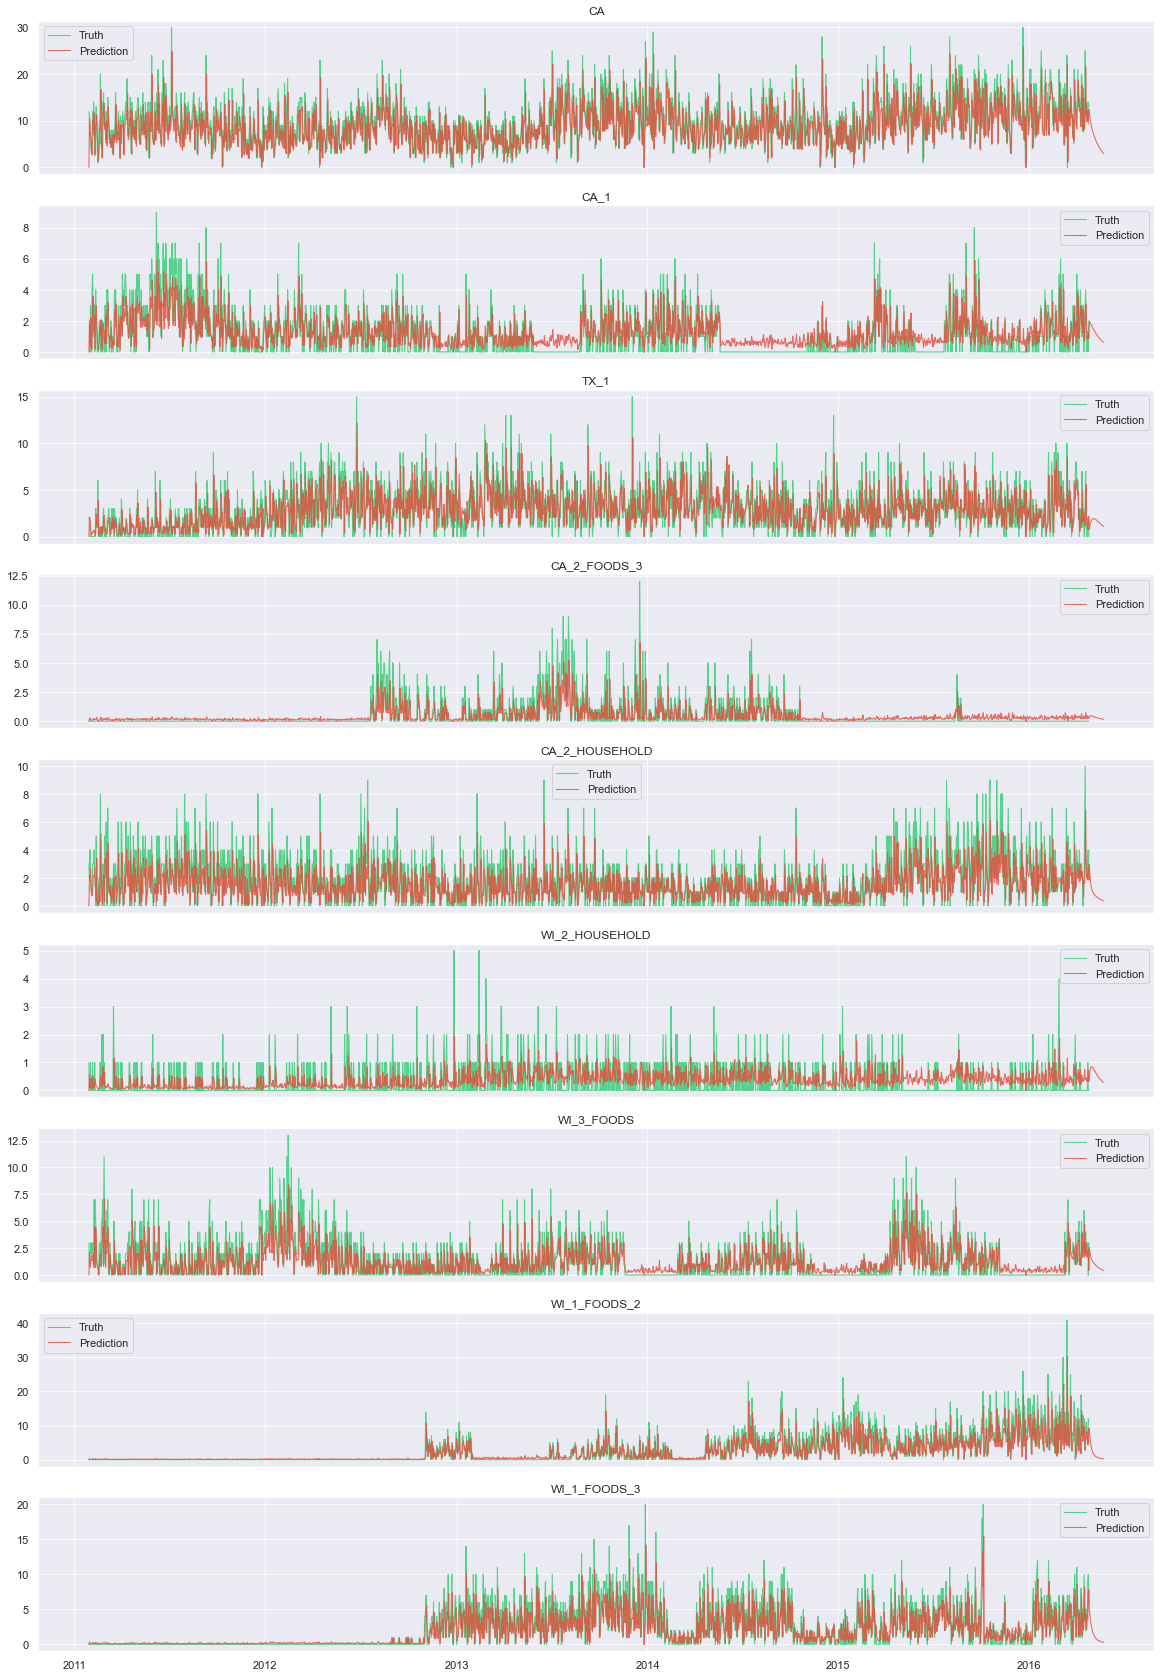

In [164]:
PLOT = ['CA', 
        'CA_1',
        'TX_1', 
        'CA_2_FOODS_3',
        'CA_2_HOUSEHOLD',
        'WI_2_HOUSEHOLD', 
        'WI_3_FOODS',
        'WI_1_FOODS_2', 
        'WI_1_FOODS_3',
#         'WI_2_HOUSEHOLD_1',
#         'WI_1_HOBBIES_1',
       ]

fig, axs = plt.subplots(len(PLOT), figsize=(20, 30), sharex=True)
# ax.grid(alpha=0.75)
PLOT_FROM = 0
dts = preds[PLOT_FROM:].index

for i, group in enumerate(PLOT):
    axs[i].plot(df[PLOT_FROM:][group], 
            lw=1.1, 
            color='#2ecc71', 
            alpha=0.8, 
            label='Truth')
    axs[i].plot(preds[PLOT_FROM:][group], 
            lw=1.1,
            color='#e74c3c', 
            alpha=0.8, 
            label='Prediction')
    axs[i].grid(alpha=0.75)
    axs[i].legend()
    axs[i].set_title(group)


In [165]:
dp.Report(
    dp.Plot(stationary_1_plot),
    dp.Plot(stationary_2_plot),
    dp.Plot(sarima_plot),
    dp.Plot(auto_arima_plot),
    dp.Plot(fig)

).publish(name='ARIMA for Hierarchical Time Series Forecasting', open=True, source_url='https://github.com/eugenetwc/Medium-Notebooks/blob/master/arima_hierarchical/arima_hierarchical.ipynb')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/eugene/reports/arima-for-hierarchical-time-series-forecasting/
